In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import k_means
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns



In [2]:
# Importing the dataset
dataset = pd.read_csv(r'C:\ya1\a1\Uber Request Data.csv')

# Preparing dataset

In [3]:
print(dataset.columns)

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')


In [4]:
dataset.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [5]:
#Converting Request_timestamp and drop_timestamp to uniform datetime format

dataset["Request timestamp"] = dataset["Request timestamp"].apply(lambda x: pd.to_datetime(x))

dataset["Drop timestamp"] = dataset["Drop timestamp"].apply(lambda x: pd.to_datetime(x))

In [6]:
#droping the requst id to clean data
dataset.drop(columns='Request id',inplace=True)


In [7]:
# checking for values and replacing nan in driver id to 0 ---- 0 means not found
dataset['Pickup point'].value_counts()



City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [8]:
dataset['Status'].value_counts()


Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [9]:
dataset['Driver id'].value_counts()

27.0     22
177.0    21
22.0     21
176.0    21
84.0     21
         ..
143.0     8
123.0     7
42.0      7
300.0     6
265.0     6
Name: Driver id, Length: 300, dtype: int64

In [10]:
dataset['Request timestamp'].value_counts()

2016-11-07 19:02:00    6
2016-11-07 08:37:00    6
2016-11-07 09:40:00    6
2016-11-07 17:57:00    6
2016-12-07 19:17:00    5
                      ..
2016-11-07 03:29:00    1
2016-07-14 21:18:23    1
2016-07-15 07:04:55    1
2016-07-14 20:22:44    1
2016-07-13 19:31:23    1
Name: Request timestamp, Length: 5618, dtype: int64

In [11]:
dataset['Drop timestamp'].value_counts()

2016-12-07 21:04:00    4
2016-12-07 06:22:00    4
2016-11-07 13:00:00    4
2016-12-07 21:53:00    4
2016-12-07 11:32:00    3
                      ..
2016-07-15 23:13:48    1
2016-07-13 19:54:38    1
2016-12-07 12:47:00    1
2016-07-13 05:13:54    1
2016-07-13 18:02:55    1
Name: Drop timestamp, Length: 2598, dtype: int64

In [12]:
dataset["Driver id"]=dataset["Driver id"].fillna(0)

In [13]:
dataset["Driver id"] = dataset["Driver id"].apply(lambda x: 1 if x > 1 else x)


In [14]:
dataset['Driver id'].value_counts()

1.0    4095
0.0    2650
Name: Driver id, dtype: int64

In [15]:
dataset["Request hour"] = dataset["Request timestamp"].dt.hour
dataset


,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...
6740,City,0.0,No Cars Available,2016-07-15 23:49:03,NaT,23
6741,Airport,0.0,No Cars Available,2016-07-15 23:50:05,NaT,23
6742,City,0.0,No Cars Available,2016-07-15 23:52:06,NaT,23
6743,City,0.0,No Cars Available,2016-07-15 23:54:39,NaT,23


In [16]:

dataset['Status'].replace('Trip Completed',1,inplace=True)
dataset['Status'].replace('No Cars Available',0,inplace=True)
dataset['Status'].replace('Cancelled',2,inplace=True)
dataset



,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour
0,Airport,1.0,1,2016-11-07 11:51:00,2016-11-07 13:00:00,11
1,Airport,1.0,1,2016-11-07 17:57:00,2016-11-07 18:47:00,17
2,City,1.0,1,2016-12-07 09:17:00,2016-12-07 09:58:00,9
3,Airport,1.0,1,2016-12-07 21:08:00,2016-12-07 22:03:00,21
4,City,1.0,1,2016-07-13 08:33:16,2016-07-13 09:25:47,8
...,...,...,...,...,...,...
6740,City,0.0,0,2016-07-15 23:49:03,NaT,23
6741,Airport,0.0,0,2016-07-15 23:50:05,NaT,23
6742,City,0.0,0,2016-07-15 23:52:06,NaT,23
6743,City,0.0,0,2016-07-15 23:54:39,NaT,23


# Visualizing data

<AxesSubplot:xlabel='Request hour', ylabel='Status'>

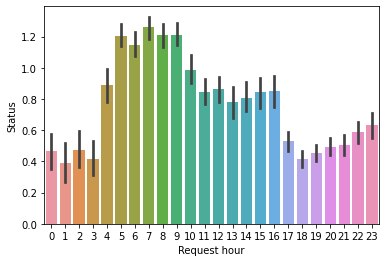

In [17]:
sns.barplot(x='Request hour',y='Status',data=dataset)


<AxesSubplot:xlabel='Status', ylabel='Request hour'>

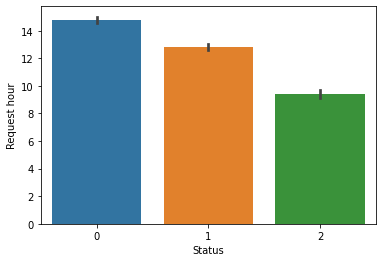

In [18]:
sns.barplot(x='Status',y='Request hour',data=dataset)
#most of the rides r either canceled or no cars were available 

<AxesSubplot:xlabel='Pickup point', ylabel='count'>

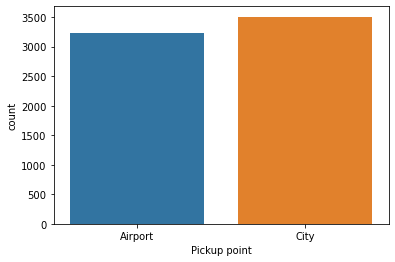

In [19]:

#pick points almost the same
sns.countplot(x='Pickup point',data=dataset)




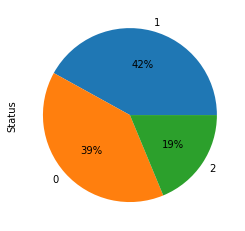

In [20]:
dataset["Status"].value_counts().plot.pie(autopct='%1.0f%%')
plt.show()
#the number of cancelation is very high 

<AxesSubplot:xlabel='Pickup point', ylabel='Request hour'>

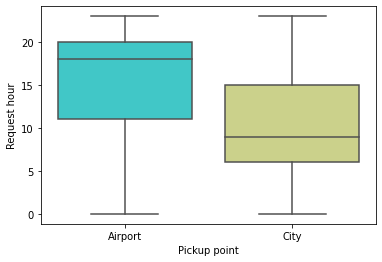

In [21]:

sns.boxplot(x="Pickup point", y="Request hour", data=dataset,palette='rainbow')
#most of the rides from the airport are after 10 while from the city is after 5

<AxesSubplot:xlabel='Status', ylabel='Request hour'>

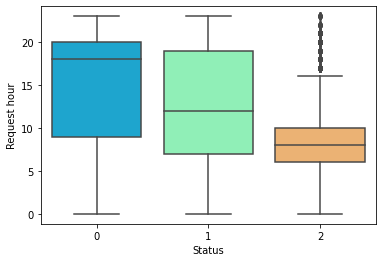

In [22]:

sns.boxplot(x="Status", y="Request hour", data=dataset,palette='rainbow')
#cars are mostly not available from 8 to 20 even though it is a russh hour


Object `////` not found.


<AxesSubplot:xlabel='Status', ylabel='Pickup point'>

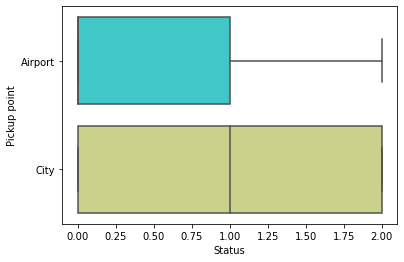

In [23]:
?////
sns.boxplot(x="Status", y="Pickup point", data=dataset,palette='rainbow')
# non of the rids from the airport is canceled



<AxesSubplot:xlabel='Pickup point', ylabel='Request hour'>

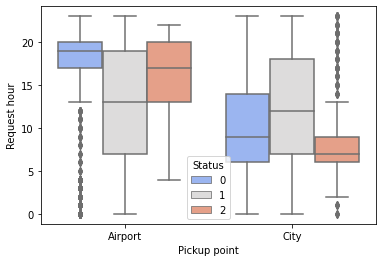

In [24]:

sns.boxplot(x="Pickup point", y="Request hour", hue="Status",data=dataset, palette="coolwarm")
#the number of rides from City = 3507 while from Airport=3238 they are almost the same
#most of the late rids from the airport are cancled and there is no available cars too from 18 to 20
#most of the early rids from the city are cancled and there is no available cars too at this time


<AxesSubplot:>

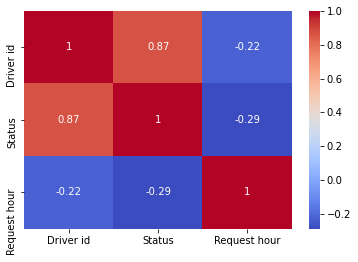

In [25]:
sns.heatmap(dataset.corr(),cmap='coolwarm',annot=True)

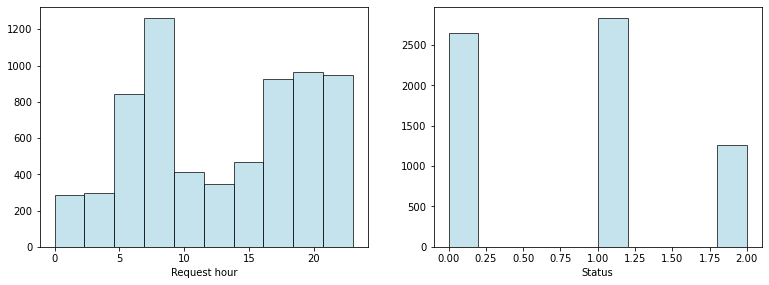

In [26]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))

plt.subplot(3,3,2)
plt.hist(dataset['Request hour'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Request hour')

plt.subplot(3,3,3)
plt.hist(dataset['Status'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Status')

plt.show()

In [27]:
#droping the driver id,Request timestamp,Drop timestamp  to clean data
dataset.drop(columns='Driver id',inplace=True)
dataset.drop(columns='Request timestamp',inplace=True)
dataset.drop(columns='Drop timestamp',inplace=True)


In [28]:
dataset['Pickup point'].replace('Airport',1,inplace=True)
dataset['Pickup point'].replace('City',0,inplace=True)

In [29]:
dataset.dropna(inplace=True, axis=1)

In [30]:
dataset

,Pickup point,Status,Request hour
0,1,1,11
1,1,1,17
2,0,1,9
3,1,1,21
4,0,1,8
...,...,...,...
6740,0,0,23
6741,1,0,23
6742,0,0,23
6743,0,0,23


# Classification

# Train and Test Split

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, normalize
X =dataset[['Pickup point','Request hour']]
y=dataset['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
from sklearn.metrics import plot_confusion_matrix

# KNeighborsClassifier

In [38]:
model= []
accuracy = []
from sklearn.neighbors import KNeighborsClassifier
nn=0
nm=[[0, 0,  0,], [0,0, 0], [ 0,0, 0]]
for I in range (0,6744):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)

    #Confusion Matrix
    y_pred = knn.predict(X_test)
    conf_mat = confusion_matrix(y_test,y_pred)
    if nn > accuracy_score(y_pred,y_test):
        nn=format(accuracy_score(y_pred,y_test)
        nm=accuracy_score(y_pred,y_test)
    print(nn)
    print (nm)
    model.append("Knn")
   
    print(nn)
    print (nm)


SyntaxError: invalid syntax (<ipython-input-38-ebdcfad0532d>, line 15)

In [39]:
score_list = []
for each in range(1,6745):
    knn2 = KNeighborsClassifier(n_neighbors = each)
    knn2.fit(X_train,y_train)
    score_list.append(knn2.score(X_test,y_test))
    
    
plt.plot(range(1,6745),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()
# the hhighest k is 4

KeyboardInterrupt: 

# SVM

In [40]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train,y_train)


#Confusion Matrix
y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

print("accuracy of SVM': {}".format(accuracy_score(y_pred,y_test)))
model.append("SVM")
accuracy.append(accuracy_score(y_pred,y_test)) 
print(conf_mat)


accuracy of SVM': 0.5878428465530022
[[324 109  95]
 [157 298 113]
 [ 39  43 171]]


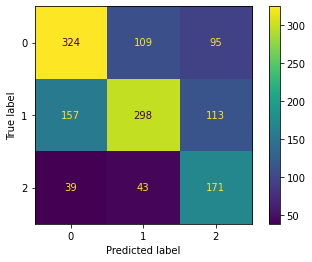

In [41]:
plot_confusion_matrix(svm, X_test, y_test)  
plt.show()

# Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_test,y_test)

#Confusion Matrix
y_pred = naive_bayes.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

print("accuracy of NB': {}".format(accuracy_score(y_pred,y_test)))
model.append("NB")
accuracy.append(accuracy_score(y_pred,y_test)) 
print(conf_mat)

accuracy of NB': 0.5255744996293551
[[295 107 126]
 [189 236 143]
 [ 42  33 178]]


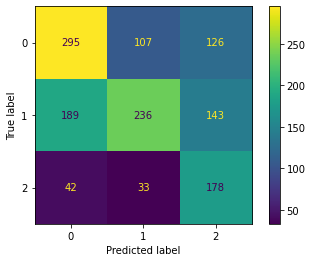

In [44]:
plot_confusion_matrix(naive_bayes, X_test, y_test)  
plt.show()

# DecisionTreeClassifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dec_tree.fit(X_train,y_train)

#Confusion Matrix
y_pred = dec_tree.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

print("accuracy of DT': {}".format(accuracy_score(y_pred,y_test)))
model.append("DT")




accuracy of DT': 0.6123054114158636


In [46]:
accuracy.append(accuracy_score(y_pred,y_test)) 
print(conf_mat)

[[321 121  86]
 [119 343 106]
 [ 30  61 162]]


In [47]:
plot_confusion_matrix(DecisionTreeClassifier, X_test, y_test)  
plt.show()

TypeError: predict() missing 1 required positional argument: 'X'

# RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(n_estimators=100, random_state=101)
from sklearn.model_selection import cross_val_score, cross_val_predict
rand_forest.fit(X_train,y_train)

#Confusion Matrix
y_pred = rand_forest.predict(X_test)
conf_mat = confusion_matrix(y_test,y_pred)

print("accuracy of RF': {}".format(accuracy_score(y_pred,y_test)))
model.append("RF")
accuracy.append(accuracy_score(y_pred,y_test)) 
print(conf_mat)


accuracy of RF': 0.6123054114158636
[[321 121  86]
 [119 343 106]
 [ 30  61 162]]


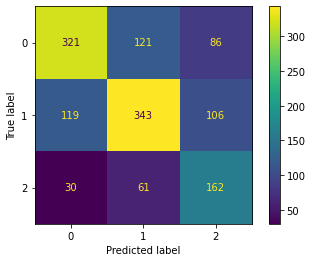

In [49]:
plot_confusion_matrix(rand_forest, X_test, y_test)  
plt.show()

In [50]:
RFC = RandomForestClassifier(n_jobs=2,n_estimators=10)
RFC.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=2)

In [51]:
importances = RFC.feature_importances_
indices = np.argsort(importances)

KeyError: "None of [Int64Index([0, 1], dtype='int64')] are in the [columns]"

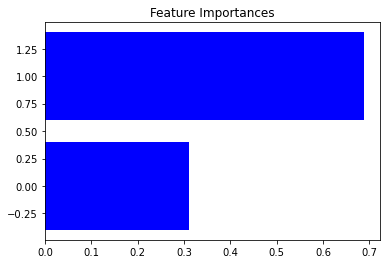

In [52]:
import pylab as pl   # for plotting stuff
pl.figure(1)
pl.title('Feature Importances')
pl.barh(range(len(indices)), importances[indices], color='b', align='center')
pl.yticks(range(len(indices)), X[indices])
pl.xlabel('Relative Importance')

pl.show()

# Accuracy 
---

In [ ]:
accuracy of knn': 
accuracy of SVM': 0.5878428465530022
accuracy of NB': 0.5255744996293551
accuracy of DT': 0.6123054114158636
accuracy of RF': 0.6123054114158636

eeven though the accuracy rate is very near RF has the highest accuracy 

# Agglomerative

In [53]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative

model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(dataset)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [54]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,0
2,1
3,0
4,1
...,...
6740,0
6741,0
6742,0
6743,0


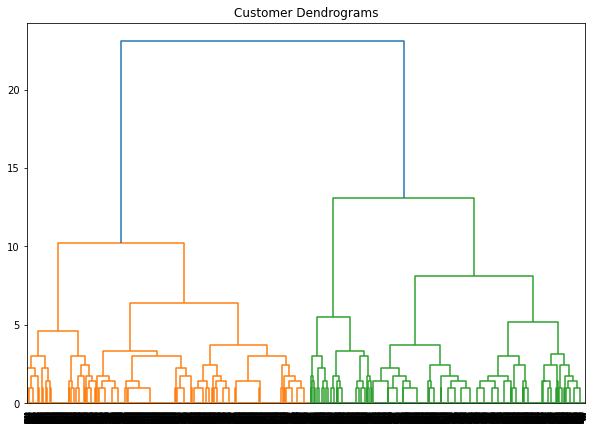

In [60]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(dataset, method="complete"))

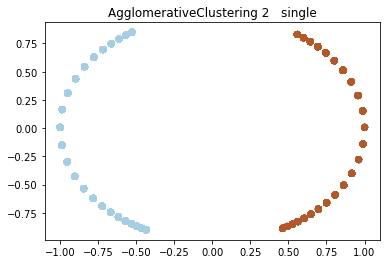

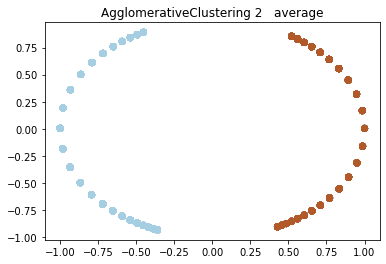

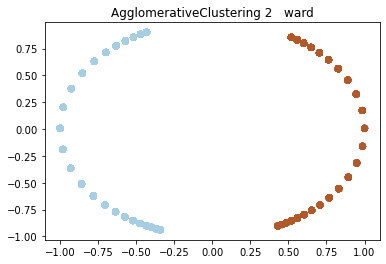

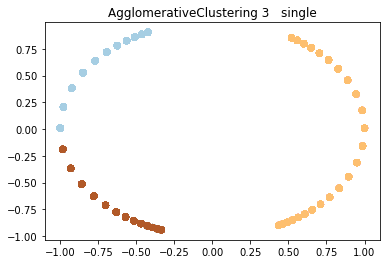

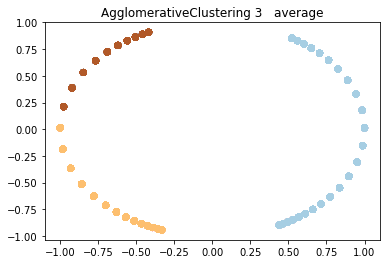

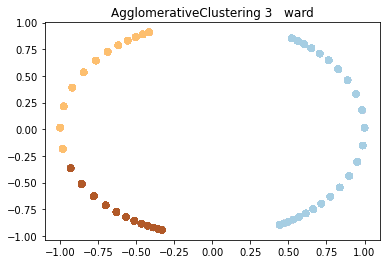

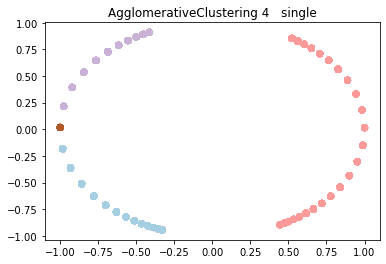

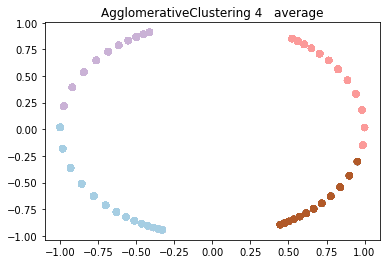

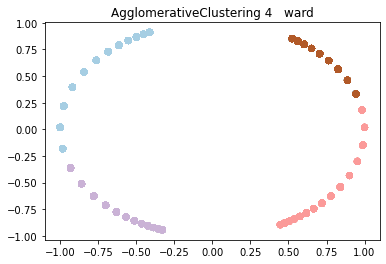

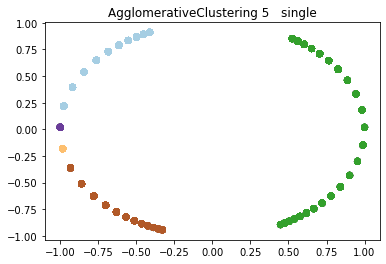

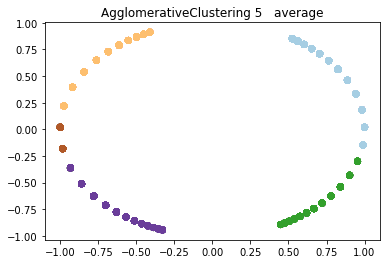

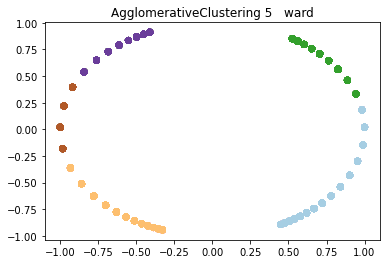

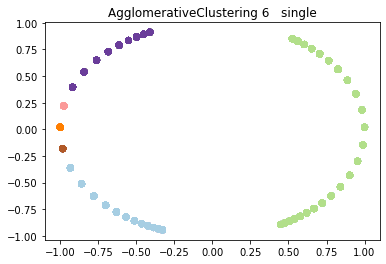

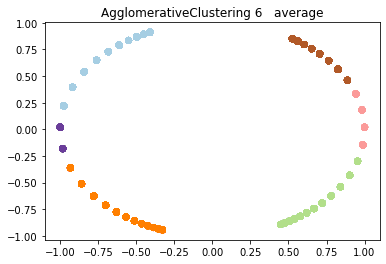

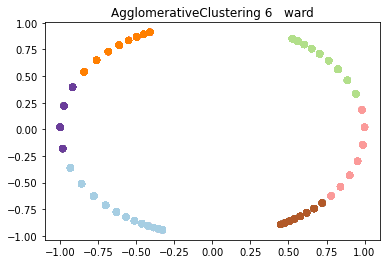

In [70]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

for i in range (2,7):
    for l in ('single','average','ward'):
        clustering = AgglomerativeClustering(n_clusters=i,linkage=l)
        clustering.fit(X)
        X_scaled = StandardScaler().fit_transform(X)
        # Normalizing the data so that the data approximately 
        X = normalize(X_scaled)
        
        y_pred = clustering.fit_predict(X)
        plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
        plt.title("AgglomerativeClustering " + str(i) + '   ' + str(l))
        plt.show()